#### Second try: clustering activities based on their multivariate time series data
#### nach der umstellung auf sekündliche Aufnahme der Einheiten, sind diese extrem lang und groß.
#### dadurch ist es schwierig, diese einheiten miteinander durch direktes custering zu vergleichen.
### Insgesamt gibt es 70 Laufeinheiten, wovon 13 mit sekündlicher auflösung aufgenommen wurden.

In [1]:
from Garmin_Handler.Handler import Overview_File_Reader, Activity_Handler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import os
import glob
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [4]:
os.chdir(r"C:\Users\nicoj\netcase\1-Start-UP\Triathlon\Aktivitaeten_csv_2")
act_list = []
for file in glob.glob("*.*"):
    if str(file).count("Laufen")==1 and str(file).count("_")<2:
        act_list.append(file)
len(act_list)

70

In [15]:
dfs= pd.DataFrame()
final_list = list()
not_list = list()
#test = np.array(pd.read_csv(act_list[0], index_col = 0)[["enhanced_speed", "heart_rate"]])
for i in range(len(act_list)):
    tcc = pd.read_csv(act_list[i], index_col = 0)[["enhanced_speed", "heart_rate"]]
    if len(tcc)<1500:
        dfs = pd.concat([dfs,tcc ], axis = 1)
        final_list.append(act_list[i])
    else:
        not_list.append(act_list[i])
    #test = np.append(test,[ pd.read_csv(act_list[i], index_col = 0)[["enhanced_speed", "heart_rate"]]], axis = 0 )

In [16]:
dfs = dfs.fillna(0)
dfs

,enhanced_speed,heart_rate,enhanced_speed,heart_rate,enhanced_speed,heart_rate,enhanced_speed,heart_rate,enhanced_speed,heart_rate,...,enhanced_speed,heart_rate,enhanced_speed,heart_rate,enhanced_speed,heart_rate,enhanced_speed,heart_rate,enhanced_speed,heart_rate
0,1.465,104.0,0.0,121.0,1.400,88.0,0.000,127.0,0.000,125.0,...,1.456,96.0,1.316,94.0,1.614,0.0,0.0,0.0,1.819,91.0
1,1.465,104.0,0.0,124.0,1.577,92.0,0.000,129.0,0.000,129.0,...,1.456,98.0,1.316,94.0,1.614,0.0,0.0,0.0,1.325,91.0
2,1.325,106.0,0.0,129.0,1.642,94.0,1.176,130.0,2.249,129.0,...,2.221,105.0,1.297,101.0,1.465,0.0,0.0,0.0,1.278,96.0
3,1.297,109.0,0.0,132.0,1.148,95.0,2.342,133.0,2.277,132.0,...,2.221,113.0,1.306,101.0,1.465,0.0,0.0,0.0,1.278,96.0
4,1.568,113.0,0.0,135.0,1.306,94.0,2.557,133.0,2.277,135.0,...,2.239,113.0,1.959,108.0,1.418,0.0,0.0,0.0,1.409,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,...,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0
850,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,...,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0
851,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,...,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0
852,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,...,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0


In [25]:
not_list

['Laufen_20201117-145743.csv',
 'Laufen_20201118-155428.csv',
 'Laufen_20201124-154812.csv',
 'Laufen_20201125-154914.csv',
 'Laufen_20201126-124722.csv',
 'Laufen_20201129-102320.csv',
 'Laufen_20201201-120738.csv',
 'Laufen_20201202-160130.csv',
 'Laufen_20201203-143233.csv',
 'Laufen_20201204-153926.csv',
 'Laufen_20201206-110106.csv',
 'Laufen_20201208-115815.csv',
 'Laufen_20201209-154259.csv']

In [33]:
dft = pd.read_csv('Laufen_20201129-102320.csv')
dft

,Unnamed: 0,timestamp,distance,enhanced_speed,enhanced_altitude,heart_rate,temperature,latitude,longitude
0,0,2020-11-29 10:23:20,0.00,1.316,246.2,100.0,25,572987680.0,93169684.0
1,1,2020-11-29 10:23:21,3.86,1.306,246.0,99.0,25,572987686.0,93167840.0
2,2,2020-11-29 10:23:22,5.28,1.306,245.8,100.0,25,572987990.0,93167246.0
3,3,2020-11-29 10:23:23,8.89,1.819,245.6,101.0,25,572988221.0,93166706.0
4,4,2020-11-29 10:23:24,12.30,2.407,245.6,102.0,25,572988564.0,93166534.0
...,...,...,...,...,...,...,...,...,...
6142,6142,2020-11-29 12:08:40,15000.03,2.650,242.8,149.0,15,572991749.0,93202366.0
6143,6143,2020-11-29 12:08:41,15002.82,2.669,242.8,NaN,15,572991642.0,93201949.0
6144,6144,2020-11-29 12:08:42,15005.58,2.678,242.8,NaN,15,572991546.0,93201472.0
6145,6145,2020-11-29 12:08:43,15008.67,2.687,242.8,NaN,15,572991421.0,93201042.0


In [18]:
# als numpy array umformen
test2 = np.array(dfs.iloc[:,:2])
test2 = np.expand_dims(test2,0)
for i in range(1,57,1):
    to_append = np.array(dfs.iloc[:,i*2:(2*i+2)])
    to_append = np.expand_dims(to_append,0)
    test2 = np.append(test2, to_append, axis = 0)

In [19]:
test2.shape

(57, 854, 2)

In [20]:
to_append.shape

(1, 854, 2)

In [21]:
test2

array([[[  1.465, 104.   ],
        [  1.465, 104.   ],
        [  1.325, 106.   ],
        ...,
        [  0.   ,   0.   ],
        [  0.   ,   0.   ],
        [  0.   ,   0.   ]],

       [[  0.   , 121.   ],
        [  0.   , 124.   ],
        [  0.   , 129.   ],
        ...,
        [  0.   ,   0.   ],
        [  0.   ,   0.   ],
        [  0.   ,   0.   ]],

       [[  1.4  ,  88.   ],
        [  1.577,  92.   ],
        [  1.642,  94.   ],
        ...,
        [  0.   ,   0.   ],
        [  0.   ,   0.   ],
        [  0.   ,   0.   ]],

       ...,

       [[  1.614,   0.   ],
        [  1.614,   0.   ],
        [  1.465,   0.   ],
        ...,
        [  0.   ,   0.   ],
        [  0.   ,   0.   ],
        [  0.   ,   0.   ]],

       [[  0.   ,   0.   ],
        [  0.   ,   0.   ],
        [  0.   ,   0.   ],
        ...,
        [  0.   ,   0.   ],
        [  0.   ,   0.   ],
        [  0.   ,   0.   ]],

       [[  1.819,  91.   ],
        [  1.325,  91.   ],
        [  1.278

In [22]:
X = test2

In [23]:
# clustering with kmeans dtw:
from tslearn.clustering import TimeSeriesKMeans

model = TimeSeriesKMeans(n_clusters=5, metric="dtw",
                         max_iter=10, random_state=0)
model.fit(X)


TimeSeriesKMeans(max_iter=10, metric='dtw', n_clusters=5, random_state=0)

In [24]:
len(model.labels_)

57

In [89]:
# checken, ob das Sinn ergbit:
#1) Laufdaten einlesen und filtern in alle die auch in der Liste sind.
activities = Overview_File_Reader().read_file()
run_data = Activity_Handler(activities).run_data()
run_data["Datum"] = pd.to_datetime(run_data["Datum"])
run_like_files = run_data[run_data["Datum"]<"23.10.2020"]
run_like_files.reset_index(drop = True, inplace = True)

# 2) Labels zu den run_daten hinzufügen.

run_wl = pd.concat([ pd.Series(model.labels_, name = "labels"), run_like_files],axis = 1)
run_wl0 = run_wl[run_wl["labels"]==0]
run_wl1 = run_wl[run_wl["labels"]==1]
run_wl2 = run_wl[run_wl["labels"]==2]
run_wl3 = run_wl[run_wl["labels"]==3]
run_wl4 = run_wl[run_wl["labels"]==4]


C:\Users\nicoj\python_projects\Garmin_Handler\Garmin_Handler\Handler.py:33: UserWarning: Standard-path has been chosen by default. Enter path to overviewfile to change this.
  warnings.warn("Standard-path has been chosen by default. Enter path to overviewfile to change this.",stacklevel=1)
C:\Users\nicoj\anaconda3\envs\tria\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [90]:
run_wl0

,labels,Aktivitätstyp,Datum,Favorit,Titel,Distanz,Kalorien,Zeit,Ø Herzfrequenz,Maximale Herzfrequenz,...,Beste Rundenzeit,Anzahl der Runden,Maximale Temperatur,Year,Month,Week,Minutes,Total time in Minutes,pace_decimal,best pace_decimal
0,0,Laufen,2020-10-22 17:40:11,False,Freiburg im Breisgau - Zone 2,8.29,635.0,2020-12-19 00:59:46,136.0,145.0,...,00:24.20,3,0.0,2020,10,42,59,59,7.216667,5.616667
1,0,Laufen,2020-10-20 13:47:14,False,Freiburg im Breisgau - 400m Intervalle,4.45,329.0,2020-12-19 00:29:04,140.0,165.0,...,01:40.12,9,0.0,2020,10,42,29,29,6.533333,4.100000
2,0,Laufen,2020-10-19 10:16:23,False,Waldems - Zone 2,8.29,649.0,2020-12-19 01:00:38,141.0,177.0,...,04:31.36,3,0.0,2020,10,42,0,60,7.316667,2.116667
7,0,Laufen,2020-10-07 18:53:47,False,Freiburg im Breisgau Laufen,8.01,617.0,2020-12-19 00:59:35,139.0,145.0,...,00:02.58,9,0.0,2020,10,40,59,59,7.433333,6.350000
9,0,Laufen,2020-09-29 10:48:45,False,Waldems Laufen,8.28,700.0,2020-12-19 00:54:38,148.0,168.0,...,01:38.92,9,0.0,2020,9,39,54,54,6.600000,3.833333
20,0,Laufen,2020-07-10 19:06:28,False,Freiburg im Breisgau Laufen,9.14,636.0,2020-12-19 01:07:56,133.0,144.0,...,01:06.93,10,0.0,2020,7,27,7,67,7.433333,6.400000
22,0,Laufen,2020-06-30 20:31:04,False,Freiburg im Breisgau Laufen,10.02,957.0,2020-12-19 01:05:42,155.0,178.0,...,00:04.62,11,0.0,2020,6,26,5,65,6.566667,5.000000
26,0,Laufen,2020-06-18 12:29:34,False,Osnabrück Laufen,3.51,303.0,2020-12-19 00:22:01,149.0,162.0,...,03:19.24,4,0.0,2020,6,24,22,22,6.266667,5.083333
28,0,Laufen,2020-05-24 12:12:05,False,Osnabrück - W07D6-Langer Lauf,10.01,978.0,2020-12-19 01:14:23,150.0,175.0,...,14:23.45,2,0.0,2020,5,20,14,74,7.433333,5.383333
32,0,Laufen,2020-05-07 18:39:57,False,Osnabrück - W05D3-Lockerer Lauf,5.22,463.0,2020-12-19 00:34:39,149.0,159.0,...,01:30.47,3,0.0,2020,5,18,34,34,6.633333,4.350000


In [80]:
run_wl1

,labels,Aktivitätstyp,Datum,Favorit,Titel,Distanz,Kalorien,Zeit,Ø Herzfrequenz,Maximale Herzfrequenz,...,Beste Rundenzeit,Anzahl der Runden,Maximale Temperatur,Year,Month,Week,Minutes,Total time in Minutes,pace_decimal,best pace_decimal
14,1,Laufen,2020-08-19 18:21:21,False,Freiburg im Breisgau Laufen,5.36,423.0,2020-12-19 00:39:06,135.0,140.0,...,02:44.53,6,0.0,2020,8,33,39,39,7.300000,5.533333
19,1,Laufen,2020-07-14 18:13:06,False,Freiburg im Breisgau Laufen,10.12,794.0,2020-12-19 01:09:34,148.0,170.0,...,00:43.36,11,0.0,2020,7,28,9,69,6.883333,5.116667
31,1,Laufen,2020-05-11 19:48:12,False,Osnabrück - W05D7-Langer Lauf,7.41,672.0,2020-12-19 00:51:16,149.0,157.0,...,01:16.23,2,0.0,2020,5,19,51,51,6.916667,5.783333


In [81]:
run_wl2

,labels,Aktivitätstyp,Datum,Favorit,Titel,Distanz,Kalorien,Zeit,Ø Herzfrequenz,Maximale Herzfrequenz,...,Beste Rundenzeit,Anzahl der Runden,Maximale Temperatur,Year,Month,Week,Minutes,Total time in Minutes,pace_decimal,best pace_decimal
25,2,Laufen,2020-06-19 18:21:58,False,Osnabrück Laufen,7.05,715.0,2020-12-19 00:46:48,NaN,NaN,...,00:15.04,8,0.0,2020,6,24,46,46,6.633333,4.9


In [82]:
run_wl3

,labels,Aktivitätstyp,Datum,Favorit,Titel,Distanz,Kalorien,Zeit,Ø Herzfrequenz,Maximale Herzfrequenz,...,Beste Rundenzeit,Anzahl der Runden,Maximale Temperatur,Year,Month,Week,Minutes,Total time in Minutes,pace_decimal,best pace_decimal
3,3,Laufen,2020-10-17 07:08:41,False,Langeoog Laufen,9.01,685.0,2020-12-19 00:58:57,143.0,168.0,...,00:03.13,10,0.0,2020,10,41,58,58,6.550000,5.516667
23,3,Laufen,2020-06-24 18:55:05,False,Osnabrück Laufen,6.76,625.0,2020-12-19 00:43:30,154.0,166.0,...,04:55.50,7,0.0,2020,6,25,43,43,6.433333,4.816667
24,3,Laufen,2020-06-22 17:23:56,False,Osnabrück Laufen,7.31,644.0,2020-12-19 00:44:48,157.0,220.0,...,01:43.59,8,0.0,2020,6,25,44,44,6.133333,3.700000
27,3,Laufen,2020-06-03 21:18:09,False,Osnabrück Laufen,3.33,282.0,2020-12-19 00:22:25,142.0,149.0,...,02:15.63,4,0.0,2020,6,22,22,22,6.733333,5.916667
29,3,Laufen,2020-05-17 12:48:03,False,Osnabrück - W06D6b-Tempolauf,3.48,293.0,2020-12-19 00:20:02,158.0,170.0,...,00:02.47,3,0.0,2020,5,19,20,20,5.750000,4.250000
30,3,Laufen,2020-05-14 17:05:01,False,Osnabrück - W06D3-Lockerer Lauf,5.26,526.0,2020-12-19 00:35:04,NaN,NaN,...,00:01.90,3,0.0,2020,5,19,35,35,6.666667,4.683333
33,3,Laufen,2020-05-06 18:49:22,False,Osnabrück Laufen,7.02,623.0,2020-12-19 00:46:32,153.0,159.0,...,00:04.32,9,0.0,2020,5,18,46,46,6.633333,5.633333
37,3,Laufen,2020-04-21 13:54:23,False,Osnabrück - W03D1-Technik-Lauftraining,6.04,545.0,2020-12-19 00:39:48,155.0,173.0,...,01:00.00,15,0.0,2020,4,16,39,39,6.600000,4.016667
39,3,Laufen,2020-04-15 20:33:50,False,Osnabrück - W02D2-Langer Lauf,6.19,510.0,2020-12-19 00:45:12,151.0,162.0,...,00:11.79,2,0.0,2020,4,15,45,45,7.300000,5.900000
41,3,Laufen,2020-04-08 20:36:05,False,Osnabrück - W01D2-Lockerer Lauf,3.73,260.0,2020-12-19 00:31:31,130.0,157.0,...,00:01.46,4,0.0,2020,4,14,31,31,8.450000,3.800000


In [83]:
run_wl4

,labels,Aktivitätstyp,Datum,Favorit,Titel,Distanz,Kalorien,Zeit,Ø Herzfrequenz,Maximale Herzfrequenz,...,Beste Rundenzeit,Anzahl der Runden,Maximale Temperatur,Year,Month,Week,Minutes,Total time in Minutes,pace_decimal,best pace_decimal
4,4,Laufen,2020-10-16 07:09:25,False,Langeoog Laufen,7.77,632.0,2020-12-19 00:48:30,150.0,178.0,...,04:07.60,8,0.0,2020,10,41,48,48,6.250000,1.850000
5,4,Laufen,2020-10-12 17:39:33,False,Freiburg im Breisgau Laufen,10.21,741.0,2020-12-19 01:15:10,135.0,143.0,...,01:36.83,11,0.0,2020,10,41,15,75,7.366667,5.700000
6,4,Laufen,2020-10-09 16:36:35,False,Freiburg im Breisgau Laufen,10.00,820.0,2020-12-19 00:57:01,160.0,171.0,...,00:01.22,11,0.0,2020,10,40,57,57,5.700000,4.783333
8,4,Laufen,2020-10-05 19:44:14,False,Freiburg im Breisgau Laufen,4.19,374.0,2020-12-19 00:25:56,156.0,165.0,...,01:13.96,5,0.0,2020,10,40,25,25,6.200000,4.966667
10,4,Laufen,2020-09-19 15:58:02,False,Freiburg im Breisgau Laufen,5.20,438.0,2020-12-19 00:29:57,160.0,181.0,...,01:07.59,6,0.0,2020,9,37,29,29,5.766667,4.550000
11,4,Laufen,2020-09-16 17:38:52,False,Freiburg im Breisgau Laufen,4.74,361.0,2020-12-19 00:34:42,137.0,151.0,...,06:03.72,5,0.0,2020,9,37,34,34,7.316667,5.833333
12,4,Laufen,2020-09-08 18:19:46,True,Freiburg im Breisgau Laufen,5.01,399.0,2020-12-19 00:25:25,174.0,184.0,...,00:03.83,6,0.0,2020,9,36,25,25,5.066667,4.200000
13,4,Laufen,2020-08-27 09:37:23,False,Rapallo Laufen,5.12,491.0,2020-12-19 00:33:01,NaN,NaN,...,00:56.33,6,0.0,2020,8,34,33,33,6.450000,4.933333
15,4,Laufen,2020-08-13 20:17:22,False,Freiburg im Breisgau Laufen,7.62,527.0,2020-12-19 00:56:11,131.0,143.0,...,04:53.78,8,0.0,2020,8,32,56,56,7.383333,6.183333
16,4,Laufen,2020-08-07 13:55:19,False,Freiburg im Breisgau Laufen,4.01,322.0,2020-12-19 00:23:10,157.0,181.0,...,00:03.38,5,0.0,2020,8,31,23,23,5.783333,3.633333


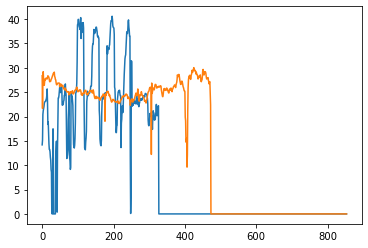

In [168]:
plt.plot(dfs.iloc[-2,:])
plt.plot(dfs.iloc[-4,:])


In [ ]:
plt.plot(dfs.iloc[15,:])
